In [1]:
import loader
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,SGDClassifier


C:\Users\michal balaban\miniconda3\envs\hebnlp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
movie_reviews = loader.load_imdb_data()
print(movie_reviews.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was wonderful way to spend time...  positive
3  basically there a family where little boy jake...  negative
4  petter mattei love in the time of money is vis...  positive


In [3]:
# Show how many positive and negative values exist
print(movie_reviews['sentiment'].value_counts())


positive    25000
negative    25000
Name: sentiment, dtype: int64


In [4]:
# Investigating the data

def show_word_cloud(texsts, stopwords = STOPWORDS ):
    wordcloud = WordCloud(stopwords=stopwords,
                          background_color='black',
                          width=3000,
                          height=2500
                          ).generate(texsts)
    plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    # plt.show()

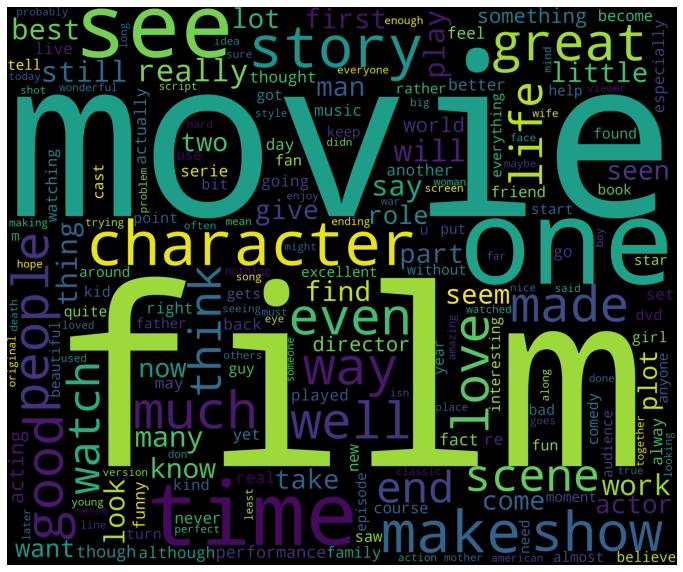

In [5]:
positive_reviews = movie_reviews[movie_reviews['sentiment'] == 'positive']
positive_words = ' '.join(positive_reviews['review'])
show_word_cloud(positive_words)

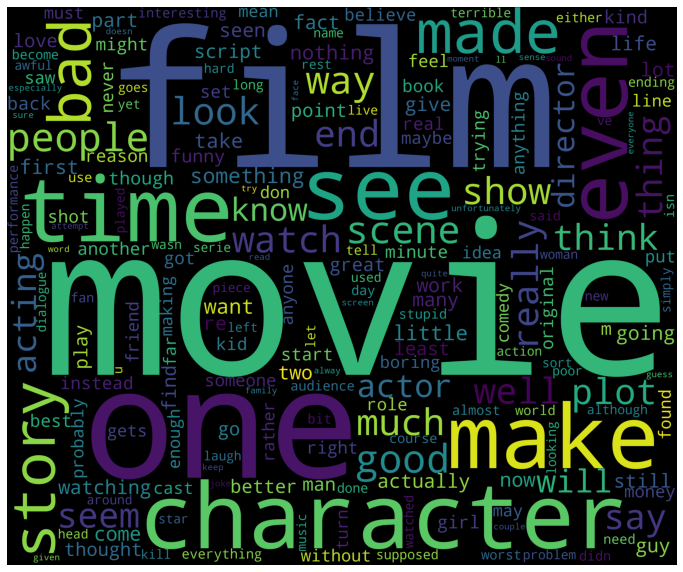

In [6]:
negative_reviews = movie_reviews[movie_reviews['sentiment'] == 'negative']
negative_words = ' '.join(negative_reviews['review'])
show_word_cloud(negative_words)

# Now let's see the most common words without the words both Negative and Positive share

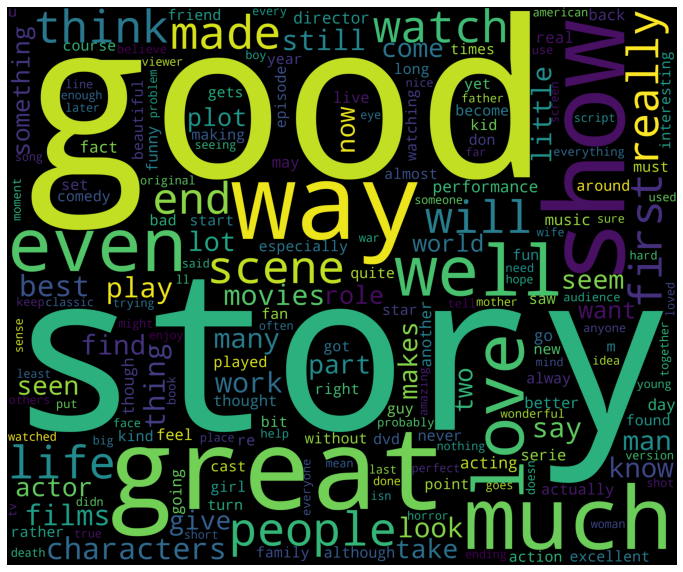

In [7]:
imdb_stopwords = set(STOPWORDS).union({'film', 'movie', 'one', 'character','time', 'see', 'make'})
show_word_cloud(positive_words, imdb_stopwords)


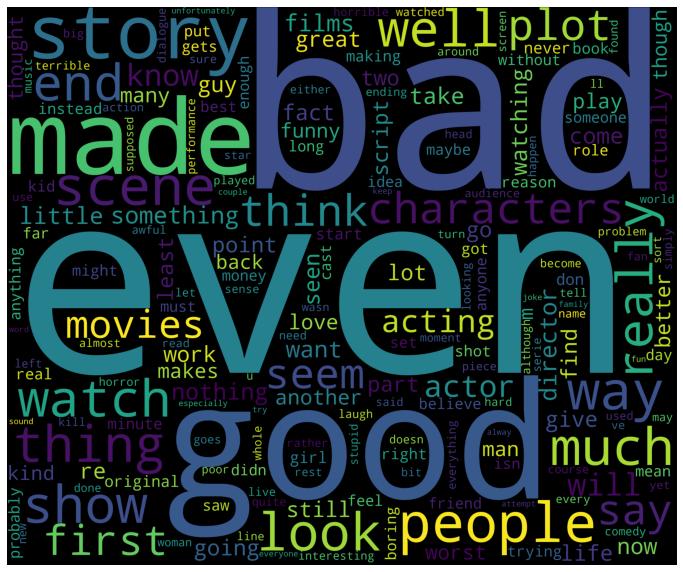

In [8]:
show_word_cloud(negative_words, imdb_stopwords)


In [9]:
GENERAL_STOPWORDS = set(STOPWORDS)
GENERAL_STOPWORDS.remove('not')
GENERAL_STOPWORDS.remove('no')


In [10]:
import gensim.downloader as api
w2v_model = api.load("word2vec-google-news-300")


In [11]:
def turn_sentence_to_encoding(sentence: str):
    """
    Turns sentence into an average vector of the encodings of the words in the sentence.
    Not including stop words
    returns np array
    """
    words = sentence.split("\s+")
    embeddings_vec = []
    num_relevant_words = 0
    for word in words:
        if word not in GENERAL_STOPWORDS and word in w2v_model:
            embeddings_vec.append(w2v_model[word])
            num_relevant_words += 1
    if num_relevant_words == 0:
        return np.zeros(loader.W2V_EMBEDDING_DIM)
    vec = np.array(embeddings_vec)
    embeddings_sum = np.sum(vec)
    return embeddings_sum / num_relevant_words



In [12]:
from sklearn.model_selection import train_test_split
movie_reviews_encoded = movie_reviews['review'].apply(turn_sentence_to_encoding)

In [13]:
sentiment = movie_reviews['sentiment'].map({'positive':1, 'negative':0})
X_train, X_test, y_train, y_test = train_test_split(
    movie_reviews_encoded, sentiment, test_size=0.2, random_state=42)

In [14]:
imdb_svm = SGDClassifier()
imdb_svm.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [ ]:
accuracy_imdb_on_imdb = imdb_svm.score(X_test, y_test)
print("Imdb svm accuracy on test is: ", accuracy_imdb_on_imdb)